In [1]:
import pandas as pd

In [2]:
#Cargar datos csv
data = pd.read_csv('HR_comma_sep.csv')

In [3]:
# Función para exploración de los datos
def df_exploration(df):
    # Revisión básica de los datos
    print(df.info())  # Para revisar los tipos de datos
    print(f"\nValores duplicados: {df.duplicated().sum()}")  # Revisa si hay duplicados en los datasets
    print(f"\nValores nulos: \n{df.isnull().sum()}") # Revisar valores nulos
    print (f"\nValores unicos: \n{df.nunique()}") # Revisar valores unicos
    return df

In [4]:
df_exploration(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

Valores duplicados: 3008

Valores nulos: 
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident         

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
# Eliminar datos duplicados
data = data.drop_duplicates()

In [6]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Standardize the column names
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [8]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
data['time_spend_company'].value_counts() 

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [10]:
data['number_project'].value_counts() 

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

In [11]:
data['work_accident'].value_counts() 

work_accident
0    10141
1     1850
Name: count, dtype: int64

In [12]:
data['left'].value_counts() 

left
0    10000
1     1991
Name: count, dtype: int64

In [13]:
data['promotion_last_5years'].value_counts() 

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

In [14]:
data['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [15]:
data['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [16]:
data_numerics = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
data_categorical = data[['work_accident','promotion_last_5years', 'department', 'salary']]
data_target = data['left']

In [17]:
# Matriz de correlación
data.corr()

ValueError: could not convert string to float: 'sales'

## EDA categorical columns

### Work accident

In [18]:
# Frequency table for 'work_accident'
freq_work_accident = data['work_accident'].value_counts()

# Calculating the proportion of each unique value in 'work_accident'
perc_work_accident = data['work_accident'].value_counts(normalize=True)

freq_work_accident, perc_work_accident

(work_accident
 0    10141
 1     1850
 Name: count, dtype: int64,
 work_accident
 0    0.845718
 1    0.154282
 Name: proportion, dtype: float64)

<Axes: xlabel='work_accident', ylabel='count'>

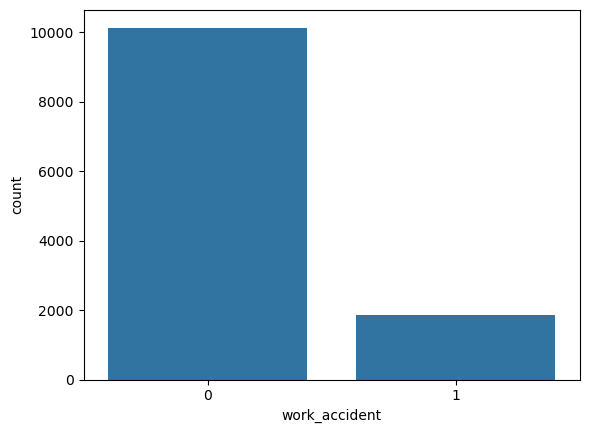

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the work acident column
sns.countplot(x='work_accident', data=data)

In [37]:
# Analyze the relationship between 'left' and 'work_accident'
crosstab_work_accident = pd.crosstab(data['work_accident'], data['left'])
work_accident_rate = (crosstab_work_accident.div(crosstab_work_accident.sum(axis=0))* 100).round(2)
work_accident_rate

left,0,1
work_accident,,
0,82.55,94.73
1,17.45,5.27


In [34]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

chi2, p, dof, ex = chi2_contingency(crosstab_work_accident)
cramer = association(crosstab_work_accident, method="cramer")

p,cramer

(9.911242628423175e-43, 0.12543639966703993)

<Axes: xlabel='left', ylabel='count'>

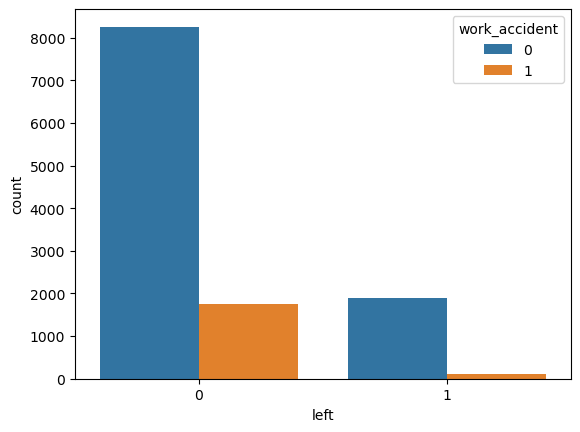

In [32]:
# Visualize the relationship between 'left' and 'work_accident'
sns.countplot(x='left', hue='work_accident', data=data)

### Left

In [22]:
# Frequency table for 'left'
freq_left = data['left'].value_counts()

# Calculating the proportion of each unique value in 'left'
perc_left = data['left'].value_counts(normalize=True)

freq_left, perc_left

(left
 0    10000
 1     1991
 Name: count, dtype: int64,
 left
 0    0.833959
 1    0.166041
 Name: proportion, dtype: float64)

<Axes: xlabel='left', ylabel='count'>

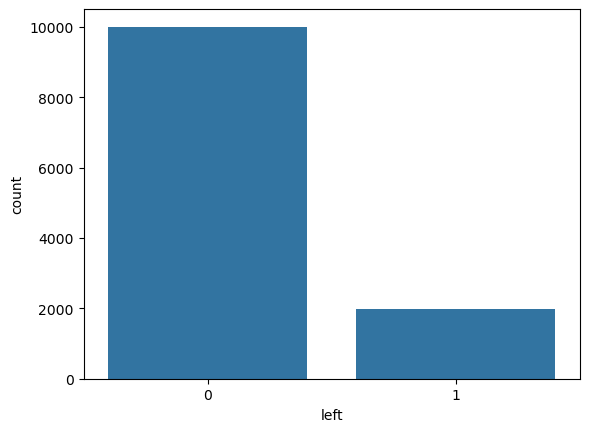

In [23]:
# Visualize the left column
sns.countplot(x='left', data=data)

### Promotion

In [24]:
# Frequency table for 'promotion_last_5years'
freq_promotion = data['promotion_last_5years'].value_counts()

# Calculating the proportion of each unique value in 'promotion_last_5years'
perc_promotion = data['promotion_last_5years'].value_counts(normalize=True)

freq_promotion, perc_promotion

(promotion_last_5years
 0    11788
 1      203
 Name: count, dtype: int64,
 promotion_last_5years
 0    0.983071
 1    0.016929
 Name: proportion, dtype: float64)

<Axes: xlabel='promotion_last_5years', ylabel='count'>

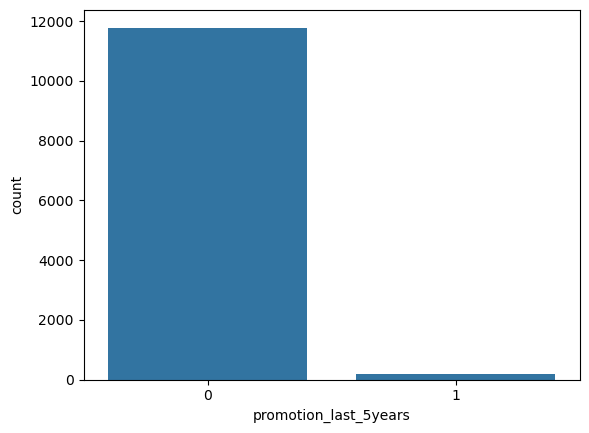

In [25]:
# Visualize the promotion column
sns.countplot(x='promotion_last_5years', data=data)

In [40]:
# Analyze the relationship between 'left' and 'promotion_last_5years'
crosstab_promotion = pd.crosstab(data['promotion_last_5years'], data['left'])
promotion_rate = (crosstab_promotion.div(crosstab_promotion.sum(axis=0)) * 100).round(2)
promotion_rate

left,0,1
promotion_last_5years,,
0,98.05,99.6
1,1.95,0.4


In [38]:
chi2, p, dof, ex = chi2_contingency(crosstab_promotion)
cramer = association(crosstab_promotion, method="cramer")

p,cramer

(1.6266615348676462e-06, 0.04465728624587982)

<Axes: xlabel='left', ylabel='count'>

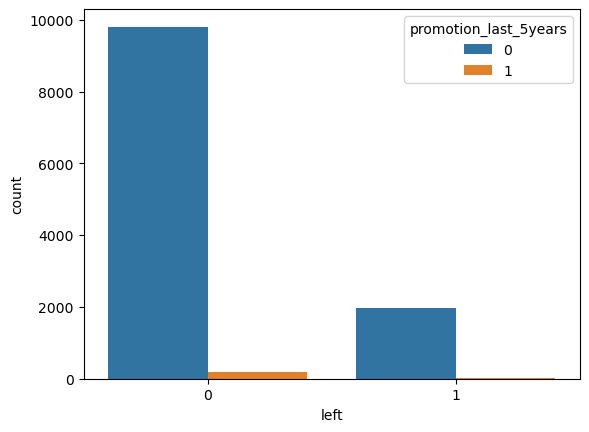

In [39]:
# Visualize the relationship between 'left' and 'promotion_last_5years'
sns.countplot(x='left', hue='promotion_last_5years', data=data)

### Department

In [26]:
# Frequency table for 'department'
freq_department = data['department'].value_counts()

# Calculating the proportion of each unique value in 'department'
perc_department = data['department'].value_counts(normalize=True)

freq_department, perc_department

(department
 sales          3239
 technical      2244
 support        1821
 IT              976
 RandD           694
 product_mng     686
 marketing       673
 accounting      621
 hr              601
 management      436
 Name: count, dtype: int64,
 department
 sales          0.270119
 technical      0.187140
 support        0.151864
 IT             0.081394
 RandD          0.057877
 product_mng    0.057210
 marketing      0.056125
 accounting     0.051789
 hr             0.050121
 management     0.036361
 Name: proportion, dtype: float64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

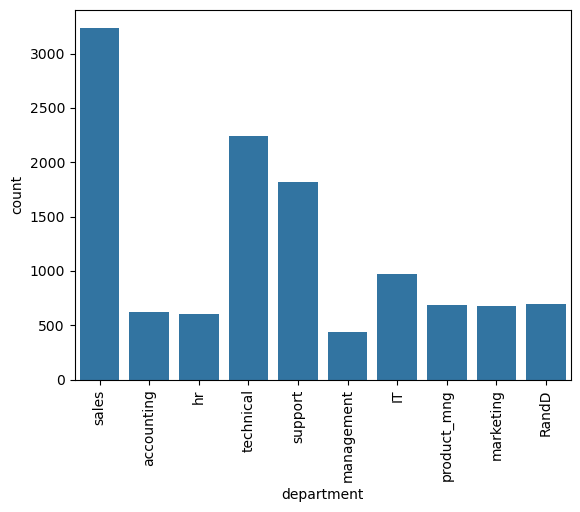

In [31]:
# Visualize the department column
sns.countplot(x='department', data=data)
plt.xticks(rotation=90)

In [41]:
# Analyze the relationship between 'left' and 'department'
crosstab_department = pd.crosstab(data['department'], data['left'])
department_rate = (crosstab_department.div(crosstab_department.sum(axis=0)) * 100).round(2)
department_rate

left,0,1
department,,
IT,8.18,7.94
RandD,6.09,4.27
accounting,5.12,5.47
hr,4.88,5.68
management,3.84,2.61
marketing,5.61,5.63
product_mng,5.76,5.52
sales,26.89,27.62
support,15.09,15.67


In [42]:
chi2, p, dof, ex = chi2_contingency(crosstab_department)
cramer = association(crosstab_department, method="cramer")

p,cramer

(0.01329832963300122, 0.041706482339697766)

<Axes: xlabel='left', ylabel='count'>

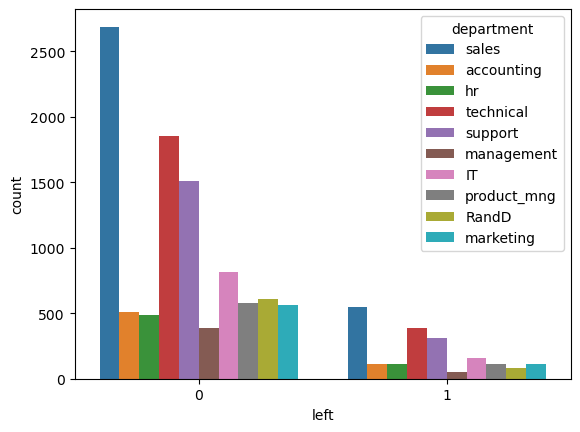

In [43]:
# Visualize the relationship between 'left' and 'department'
sns.countplot(x='left', hue='department', data=data)

### Salary

In [28]:
# Frequency table for 'salary'
freq_salary = data['salary'].value_counts()

# Calculating the proportion of each unique value in 'work_accident'
perc_salary = data['salary'].value_counts(normalize=True)

freq_salary, perc_salary

(salary
 low       5740
 medium    5261
 high       990
 Name: count, dtype: int64,
 salary
 low       0.478692
 medium    0.438746
 high      0.082562
 Name: proportion, dtype: float64)

<Axes: xlabel='salary', ylabel='count'>

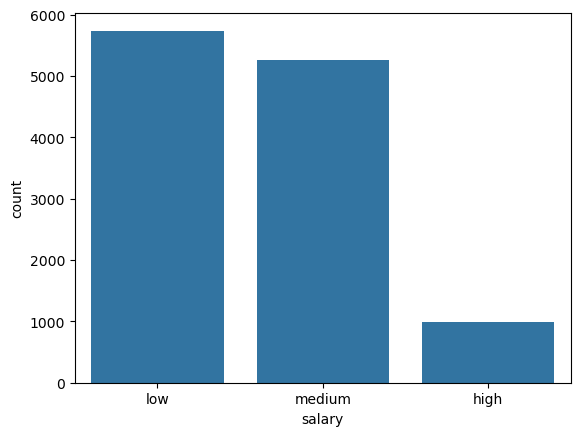

In [29]:
# Visualize the salary column
sns.countplot(x='salary', data=data)

In [44]:
# Analyze the relationship between 'left' and 'salary'
crosstab_salary = pd.crosstab(data['salary'], data['left'])
salary_rate = (crosstab_salary.div(crosstab_salary.sum(axis=0)) * 100).round(2)
salary_rate

left,0,1
salary,,
high,9.42,2.41
low,45.66,58.97
medium,44.92,38.62


In [45]:
chi2, p, dof, ex = chi2_contingency(crosstab_salary)
cramer = association(crosstab_salary, method="cramer")

p,cramer

(8.984123357404531e-39, 0.1208794944103406)

<Axes: xlabel='left', ylabel='count'>

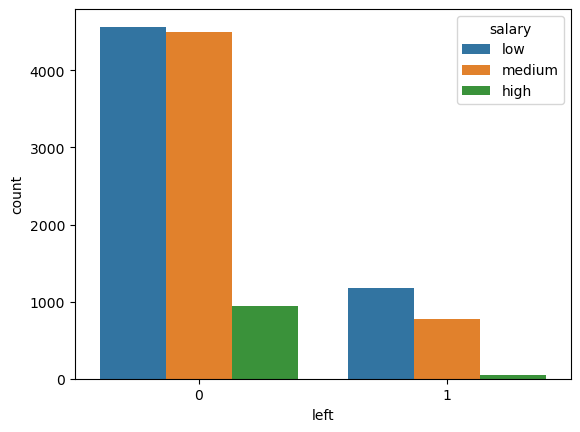

In [46]:
# Visualize the relationship between 'left' and 'salary'
sns.countplot(x='left', hue='salary', data=data)